<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Исследование структуры данных

# [Ссылка на исходный датасет](https://drive.google.com/file/d/17boNPkn5vcjkcsniJY0RTLNnwksx3l_q/view?usp=sharing)

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [2]:
hh_cv_orig = pd.read_csv('data/dst-3.0_16_1_hh_database.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
display(hh_cv_orig.head())

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

In [4]:
hh_cv_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
null_cols = hh_cv_orig.isnull().sum()
hh_cv_null_cols = null_cols[null_cols>0]
print(hh_cv_null_cols)

Опыт работы                        168
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
dtype: int64


5. Выведите основную статистическую информацию о столбцах.


In [6]:
hh_cv_orig.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:

# Функция для преобразования вида образования к конкретному виду

def education_class(elem):
    elem=elem.lower()
    if 'неоконченное высшее образование' in elem:
        elem = 'неоконченное высшее'
    if 'высшее образование' in elem:
        elem = 'высшее'
    if 'среднее специальное образование' in elem:
        elem = 'среднее специальное'
    if 'среднее образование' in elem:
        elem = 'среднее'
    
    return elem

# Задание нового DF из исходного, с котормы будем в дальнейшем работать

hh_cv = hh_cv_orig.copy()


# Задание новых признаков и преведние к категориальному и удаление ненужных

hh_cv['Образование'] = hh_cv['Образование и ВУЗ'].apply(education_class)
hh_cv['Образование'] = hh_cv['Образование'].astype('category')

hh_cv = hh_cv.drop(['Образование и ВУЗ'], axis=1)


# Проверяем корректность преобразований

if hh_cv['Образование'].nunique() != 4:
    raise ValueError (
        'Something wrong, more than 4 education types, check data'
        )

2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:

# Задание новых признаков, приведение признака пола 
# к категориальному и удаление ненужных

hh_cv['Пол'] = hh_cv['Пол, возраст'].apply(
    lambda x: 'М' if 'Мужчина' in x else 'Ж'
    )

hh_cv['Пол'] = hh_cv['Пол'].astype('category')

hh_cv['Возраст'] = hh_cv['Пол, возраст'].apply(
    lambda x: int(x.split(' ')[3])
    )

hh_cv = hh_cv.drop(['Пол, возраст'], axis=1)


# По умолчанию возраст в int64, сделаем преобразование 
# для экономии памяти (0.3 MB / 8% ), предварительно проверив 
# корректность (возможность) этого (значение чисел > 127 равно 0)

if hh_cv[hh_cv['Возраст'] > 127].shape[0] == 0:
    hh_cv['Возраст'] = hh_cv['Возраст'].astype('int8')
    


# Проверяем корректность преобразований

if hh_cv['Пол'].nunique() != 2:
    raise ValueError (
        'Something wrong, more than 2 sex, check data'
        )

if hh_cv['Возраст'].dtype != 'int8':
    raise ValueError (
        'Something wrong, column "Возраст" is not INT, check data'
        )

3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [9]:

# Функция преобразования опыта соискателя в формат месяцев 
# Используем проверку по части слов на вхождение в элемент
# списка (список задаем), учитываем порядок слов \

def exprns(elem):
    try:
        counter = 0
        elem = elem.split(' ')
            
        if 'год' in elem[3]:
            counter += int(elem[2])*12
            
        if 'лет' in elem[3]:
            counter += int(elem[2])*12
        
        if 'месяц' in elem[3]:
            counter += int(elem[2])
        
        if 'месяц' in elem[5]:
            counter += int(elem[4])
        return counter
    except: 
        return None


# Задание нового признака DF и удаление ненужного
   
hh_cv['Опыт работы (месяц)'] = hh_cv['Опыт работы'].apply(exprns)

hh_cv = hh_cv.drop(['Опыт работы'], axis=1)

# print('медианный опыт работы: ', hh_cv['Опыт работы (месяц)'].median())
# print(hh_cv['Опыт работы (месяц)'].info())


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [10]:

# Функция для вычленения элемента тематики город и его обработка

def city_filling(elem):
    million_cities = ['Новосибирск', 'Екатеринбург', 
                      'НижнийНовгород', 'Казань', 'Челябинск', 
                      'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 
                      'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                      ]
    
    elem = elem.split(',')
    
    if 'Москва' in elem[0] or 'Санкт-Петер' in elem[0]:
        city = elem[0].replace(' ','')
    elif elem[0].replace(' ','') in million_cities:
        city = 'город-миллионник'
    else:
        city = 'другие'
        
    return city


# Т.к. порядок в элементе признака (как и наличие нужной инф.) не гарантируется, 
# далее используем проверку по ключевым словам

# Функция для вычленения элемента тематики переезда и его обработка

def relocate(elem):
    elem = elem.split(',')
    item_relocate = 'перее'

    for item in elem:
        if item_relocate in item:
            if 'не' in item:
                return False
            else:
                return True
            

# Функция для вычленения элемента тематики командировки и его обработка

def bis_trip(elem):
    elem = elem.split(',')
    item_bis_trip = 'коман'

    if item_bis_trip in elem[-1]:
        if 'не' in elem[-1]:
            return False
        else:
            return True 
    else:
        return False 


# Применение написанных ф-ий для задания новых признков DF и удаление ненужного

hh_cv['Город'] = hh_cv['Город, переезд, командировки'
                       ].apply(city_filling)

hh_cv['Готовность к переезду'] = hh_cv['Город, переезд, командировки'
                                 ].apply(relocate)

hh_cv['Готовность к командировкам'] = hh_cv['Город, переезд, командировки'
                                      ].apply(bis_trip)


hh_cv = hh_cv.drop(['Город, переезд, командировки'], axis =1)




5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [11]:
#ваш код здесь

# Создадим списки с типами занятости и графиками работы

prefer_work_type = ['полная занятость', 'частичная занятость', 
                    'проектная работа', 'волонтерство', 'стажировка'
                    ]
prefer_work_schdl = ['полный день', 'сменный график', 
                     'гибкий график', 'удаленная работа', 
                     'вахтовый метод'
                     ]


# Создадим новые признаки с конкретными типами занятости и графиками работы
    
for elem in prefer_work_type:
    def work_type(item):
        if elem in item:
            return True
        else:
            return False
    hh_cv[elem] = hh_cv['Занятость'].apply(work_type)
    
for elem in prefer_work_schdl:
    def work_schdl(item):
        if elem in item:
            return True
        else:
            return False
    hh_cv[elem] = hh_cv['График'].apply(work_schdl)


# Проведем требуемый анализ 

mask_1 = hh_cv['проектная работа'] == True
mask_2 = hh_cv['волонтерство'] == True
print('Количество людей, ищущих проектную работу и волонтерство = ', 
      hh_cv[mask_1 & mask_2].shape[0]
      )

mask_3 = hh_cv['вахтовый метод'] == True
mask_4 = hh_cv['гибкий график'] == True
print('Количство людей, которые хотят работать вахтовым методом \
и с гибким графиком = ',  hh_cv[mask_3 & mask_4].shape[0]
    )

# Удалим ранее созданные признаки

hh_cv = hh_cv.drop(['Занятость'], axis=1)
hh_cv = hh_cv.drop(['График'], axis=1)

Количество людей, ищущих проектную работу и волонтерство =  436
Количство людей, которые хотят работать вахтовым методом и с гибким графиком =  2311


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [12]:

from datetime import datetime, date


# Импортируем DF с курсами валют, и приведем тип данных с датами к datetime YYYY-MM-DD

exchange_data = pd.read_csv('data/ExchangeRates.csv', sep=',')
exchange_data['date'] = pd.to_datetime(exchange_data['date']).dt.date


# Приведем тип данных признака обновления резюме к формату datetime YYYY-MM-DD

hh_cv['Обновление резюме'] = pd.to_datetime(hh_cv['Обновление резюме']).dt.date


# Напишем словарь для преобразования наименования валюты в кодировке ISO
# Ключи - то, как валюта написана в исходном DF, значения - формат ISO

currency = {
    'грн': 'UAH', 'USD' : 'USD', 'EUR' : 'EUR',
    'белруб' : 'BYN', 'KGS' : 'KGS', 'сум' : 'UZS',
     'AZN' : 'AZN', 'KZT' : 'KZT', 'руб' : 'RUB'
    }


# Функция преобразования наименования валюты. Так же, в ней производим проверку 
# на возможное наличие посторонних символов (в частности, точки), очищаем значение

def currency_name_conver(elem):
    elem = elem.split(' ')
    if elem[1].isalpha() == False:
        elem[1] = ''.join(filter(str.isalnum, elem[1]))
    curr_iso = currency[f'{elem[1]}']
    
    return f'{elem[0]} {curr_iso}'


# Создаем вспомогательный признак ЗП_2, аналогичный ЗП, но в ISO формате

hh_cv['ЗП_2'] = hh_cv['ЗП'].apply(currency_name_conver)


# Создаем вспомогательный признак 'ЗП и дата' в DF hh_cv и аналогичный 
# вспомогательный признак 'Курс и дата' в DF exchange_data, 
# по ним мы будем объядинять DF

hh_cv['ЗП и дата'] = hh_cv['ЗП_2'].apply(
        lambda x: x.split(' ')[1]) + \
            ' ' + hh_cv['Обновление резюме'].apply(
                lambda x: str(x)
                )


exchange_data['Курс и дата'] = \
    exchange_data['currency'].apply(lambda x: x) +  ' '  \
       + exchange_data['date'].apply(lambda x: str(x))


# Объединяем DF

hh_cv_curr = hh_cv.join(
    exchange_data.set_index('Курс и дата'),
    on='ЗП и дата',
    how='left'
    )


# Для всех рублевых значений мы получили NaN, произведем их заполнение значением (1)

hh_cv_curr['close'] = hh_cv_curr['close'].fillna(1)
hh_cv_curr['proportion'] = hh_cv_curr['proportion'].fillna(1)


# Создадим вспомогательный признак 'ЗП_3' с числовым выражением желаемой ЗП, 
# Создадим итоговый признак 'ЗП (руб)', который заполним значениями исходя из курса 

hh_cv_curr['ЗП_3'] = hh_cv_curr['ЗП_2'].apply(
    lambda x: int(x.split(' ')[0])
    )

hh_cv_curr['ЗП (руб)'] = \
    hh_cv_curr['ЗП_3'] * hh_cv_curr['close'] / hh_cv_curr['proportion']


# Создадим список признаков на удаление и удалим их из DF циклом

columns_to_drop = ['ЗП', 'ЗП_2', 'ЗП и дата', 'currency', 
                   'per', 'date', 'time', 'close', 'vol', 
                   'proportion', 'ЗП_3'
                   ]

for elem in columns_to_drop:
    hh_cv_curr = hh_cv_curr.drop([elem], axis = 1)


# Выгрузим сверку для контроля верности выполненных преобразований 

display(hh_cv_curr.info())

hh_cv_final = hh_cv_curr.copy()

# Результат совпадает с контрольным, за исключением типа данных, 
# преобразование типа данных позволило сэкономить 0.9 MB (или 21%) ресурса памяти

C:\Users\nitys\AppData\Local\Temp\ipykernel_5864\3401127907.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  exchange_data['date'] = pd.to_datetime(exchange_data['date']).dt.date
C:\Users\nitys\AppData\Local\Temp\ipykernel_5864\3401127907.py:12: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  hh_cv['Обновление резюме'] = pd.to_datetime(hh_cv['Обновление резюме']).dt.date


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Ищет работу на должность:        44744 non-null  object  
 1   Последнее/нынешнее место работы  44743 non-null  object  
 2   Последняя/нынешняя должность     44742 non-null  object  
 3   Обновление резюме                44744 non-null  object  
 4   Авто                             44744 non-null  object  
 5   Образование                      44744 non-null  category
 6   Пол                              44744 non-null  category
 7   Возраст                          44744 non-null  int8    
 8   Опыт работы (месяц)              44574 non-null  float64 
 9   Город                            44744 non-null  object  
 10  Готовность к переезду            44744 non-null  bool    
 11  Готовность к командировкам       44744 non-null  bool    
 12  полн

None

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

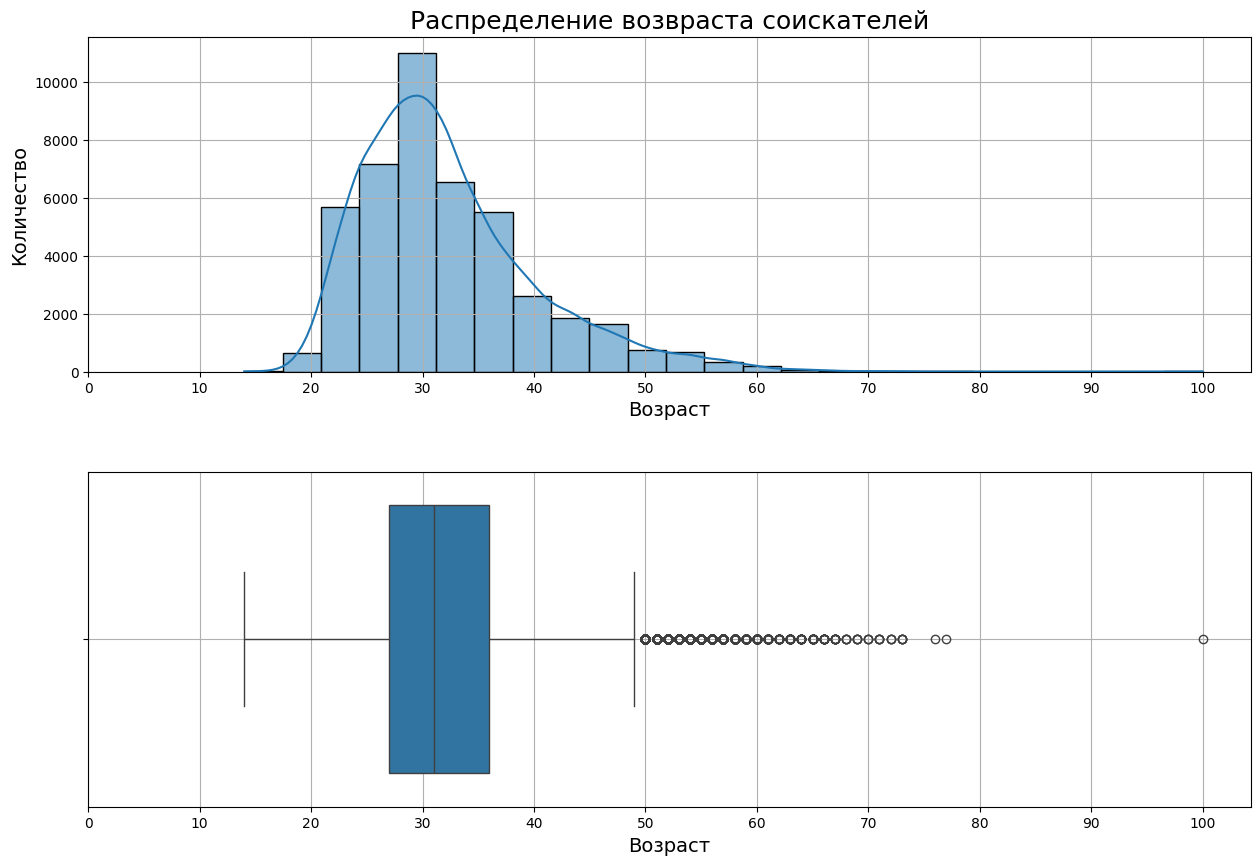

In [13]:
# Изучаем распредедение признака возраста соискателей. 
# Для построения используем библиотеку seaborn, строим два графика.
# Первый - гимстограмма, второй - коробчатая диаграмма, строим оба
# графика на одном слое. 
# Задаем необходимые параметры визуализации
# для упрощения чтения графика /


fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 10))

plt.subplots_adjust(hspace=0.3)

histplot_age = sns.histplot(
    data = hh_cv_final,
    x = 'Возраст',
    bins=25,
    kde=True,
    ax=axes[0], 
    )

histplot_age.set_ylabel('Количество', fontsize = 14)
histplot_age.set_xlabel('Возраст', fontsize = 14)
histplot_age.set(xticks=list(range(0, 110, 10)))
histplot_age.set_title('Распределение возвраста соискателей', fontsize = 18)
histplot_age.grid()


boxplot_age = sns.boxplot(
    data = hh_cv_final,
    x = 'Возраст',
    orient='h',
    
    ax=axes[1]
    )

boxplot_age.set_xlabel('Возраст', fontsize = 14)
boxplot_age.set(xticks=list(range(0, 110, 10)))
boxplot_age.grid()



****
**Из построенных графиков распределения возраста соискателей можно сделать следующие выводы и предположения:**

1) Мода распределения возраста равняется 30-ти годам

2) Возраст большинства соискателей находится в диапазоне от 26.5 до 36 лет, что можно объяснить следующим:
 
    * Нижняя граница распределения возраста (1-ая квантиль) соответствует примерно возрасту поиска второй работы, если предположить, что выпускник ВУЗа в возрасте 21-22 года устраивается на свою первую работу по распределению, либо в результате рекомендаций/приглашения членами аттестационных комиссий/по результатам производственной практики, далее работает 4-5 лет, получает практический опыт, проходит «психологическую отметку» продолжительности работы на одном месте, и решает менять работу. 

    * Спад количества соискателей после 36 лет (3-яя квантиль) можно объяснить тем, что: на данном этапе человек обзаводится деловыми связями и может менять работу через них, люди достигают руководящих должностей и продолжают на них работать, люди обзаводятся детьми и финансовыми обязательствами, что может тормозить желание сменить работу. 

3) Минимальный возраст соискателя составляет 14 лет, что подлежит требованию законодательства РФ о минимальном возрасте для устройства на работу. 

4) Максимальный возраст составляет 100 лет, что очевидно является неверным, выбросом, и на этапе очистки данных подлежит исключению. В целом же, по выбросам, они находятся в диапазоне 50 – 77 лет. В дальнейшей аналитике требуется подробное изучение кандидатов 70+, но кандидаты до 70 лет вряд ли являются выбросами. 


****

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

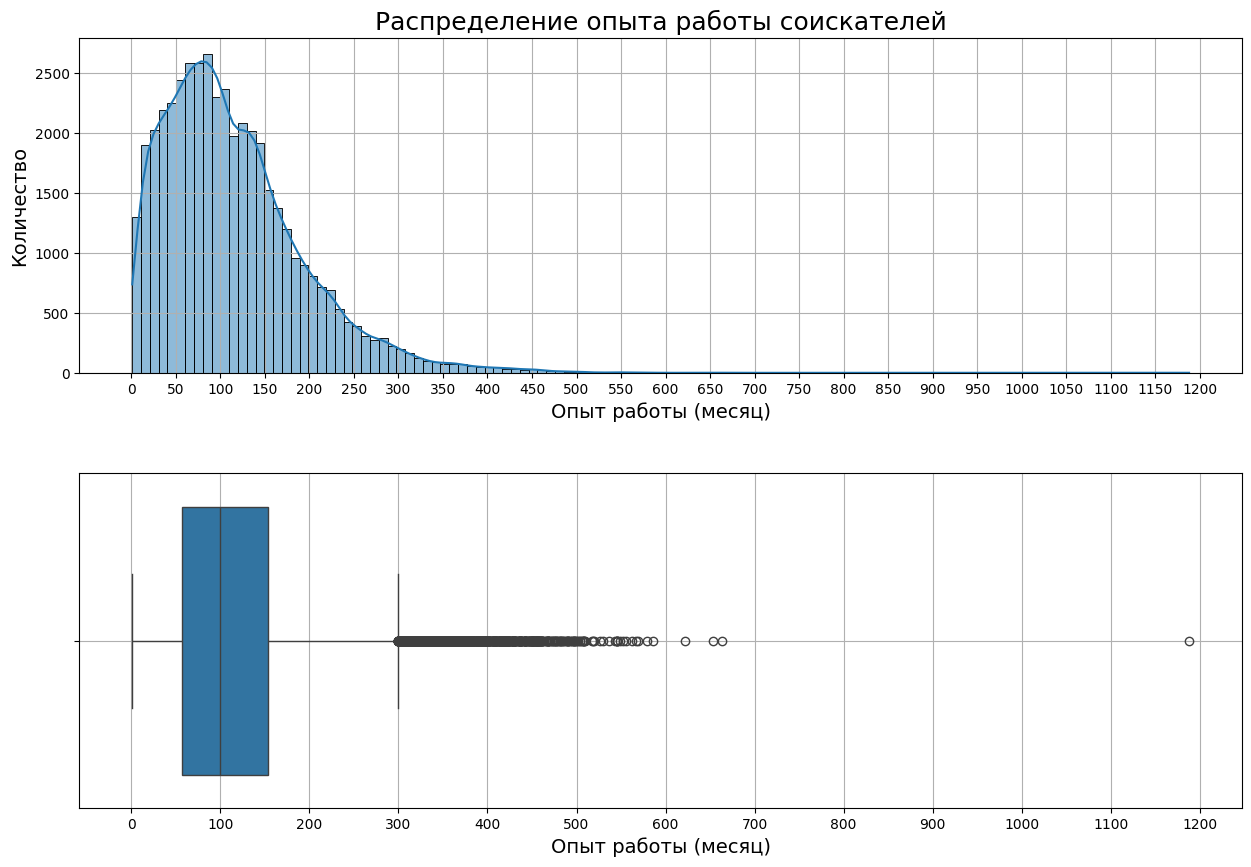

In [14]:
# Изучаем распредедение признака опыта работы соискателей. 
# Для построения используем библиотеку seaborn, строим два графика.
# Первый - гимстограмма, второй - коробчатая диаграмма, строим оба
# графика на одном слое. 
# Задаем необходимые параметры визуализации
# для упрощения чтения графика /

fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 10))
plt.subplots_adjust(hspace=0.3)

histplot_exp = sns.histplot(
    data = hh_cv_final,
    x = 'Опыт работы (месяц)',
    bins=120,
    kde=True,
    ax=axes[0]
    )

# Примечание по выбору количества стобцов: 
# При выбора небольшого количества столбцов, стало очевидно, что они 
# не отображают корректную суть (судя по сглаживающей прямой),
# поэтому было принято решение увеличить количество столбцов

histplot_exp.set_ylabel('Количество', fontsize = 14)
histplot_exp.set_xlabel('Опыт работы (месяц)', fontsize = 14)
histplot_exp.set(xticks=list(range(0, 1250, 50)))
histplot_exp.set_title(
    'Распределение опыта работы соискателей', 
    fontsize = 18
    )
histplot_exp.grid()


boxplot_exp = sns.boxplot(
    data = hh_cv_final,
    x = 'Опыт работы (месяц)',
    orient='h',
    ax=axes[1]
    )

boxplot_exp.set_xlabel('Опыт работы (месяц)', fontsize = 14)
boxplot_exp.set(xticks=list(range(0, 1300, 100)))
boxplot_exp.grid()



****
**Из полученных гистограммы и коробчатой диаграммы распределения признака опыта работы в месяцах, можно сделать следующие выводы и наблюдения:**

1)	Мода распределения равняется 80 месяцам. В целом, этот факт подтверждает гипотезу от распределения признака возраста соискателей (некогда выпускники ВУЗа, отработав на первой работе 4-6 лет ищут вторую).

2)	Так же стоит отметить следующее наблюдение, профиль гистограммы распределения опыта работы и возраста соискателей схож. Ускоренная нисходящая траектория графика по возрасту с 30 lj 42 лет. От моды 30 лет разница 12 лет, что равно 144 месяцам. Мода по опыту 80 мес + 144 мес = 224 мес. Примено с этих значений резкое падение заканчивается и кривая переход в более пологий спад. Вывод напрашивается схожий с выводом из первого блока, по мере накопления опыта работы (так же возраста), соискатели перестают пользоваться ресурсом HH.ru. Т.е. смена работы начинает происходить либо благодаря установленным за годы работы деловым контактам, либо смена позиций происходит внутри компании, либо соискатели вовсе перестают менять работу по причинам, описанным ранее.

3)	 Опыт большинства соискателей находится в диапазоне 60 – 150 месяцев. Что опять же объяснимо вышеизложенными гипотезами.

4)	Аномалии. Исходя из полученных данных разобьем аномалии на три блока: 

    * Имеется одна аномалия с опытом работы соискателя в 1188 месяцев. Аналогичная аномалия была в распределении признака возраста (где соискателю было 100 лет). Следует проверить одна и та же ли это строка и удалить ее. 

    * Так же имеется три выброса с опытом работы более 600 месяцев (более 50 лет). Но, стоит отметить, что и в распределении признака возраста так же имеются соискатели возраста 70+. Поэтому утверждать, что эти данные являются выбросами и некорректны, преждевременно. Но, стоит обратить на них внимание. 
    
    * Относительно же выбросов с опытом 300-600 месяцев (25-50 лет), можно сказать, что эти данные выглядят реальными, к тому же это коррелируется с выбросами признака возраста (50-70 лет). Поэтому диапазон значений по возрасту 50-70 лет и по опыту 300-600 месяцев подлежит более детальному разбору опционально. 

****

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака возраста? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


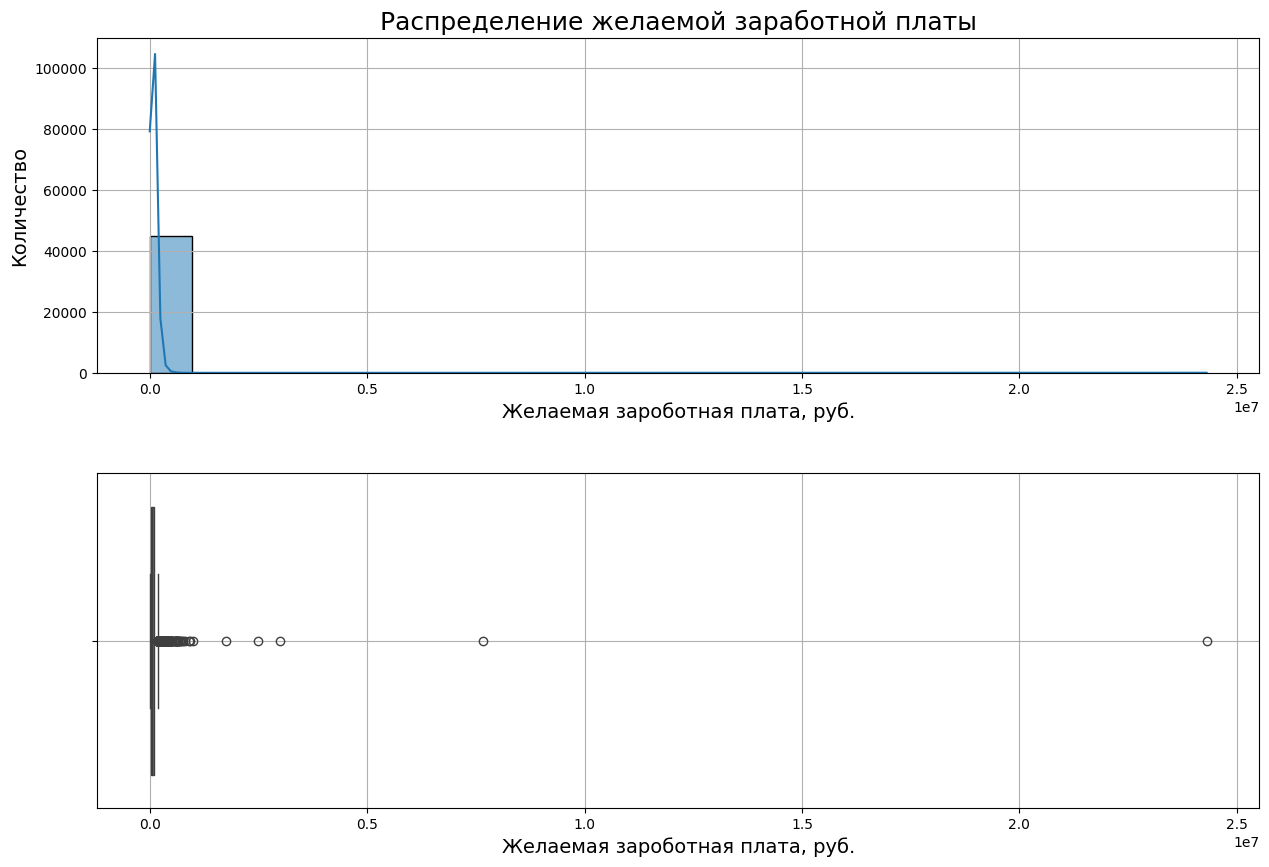

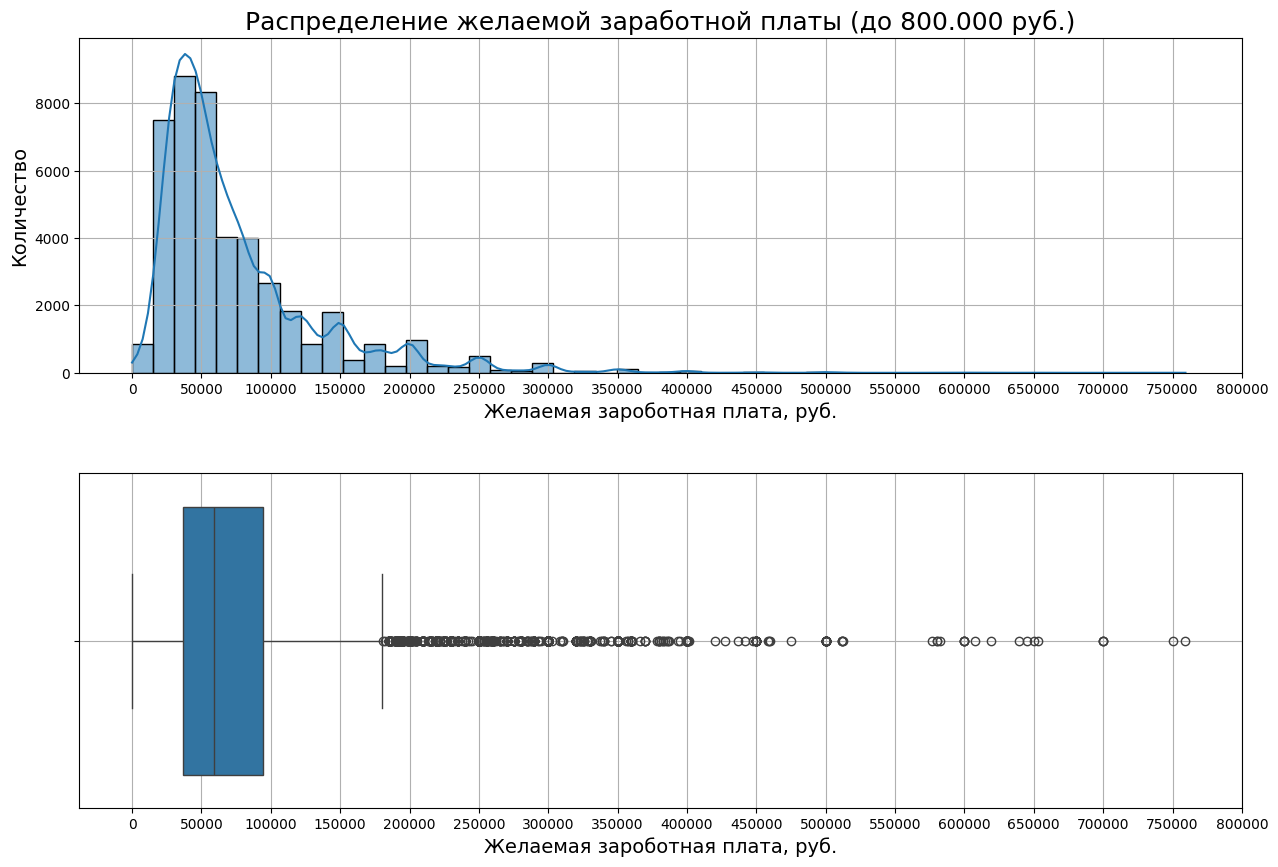

In [15]:
# Изучаем распредедение признака желаемой зараб.платы соискателей. 
# Для построения используем библиотеку seaborn, строим два графика.
# Первый - гимстограмма, второй - коробчатая диаграмма, строим оба
# графика на одном слое. 
# Задаем необходимые параметры визуализации
# для упрощения чтения графика 
# Построение проивзодим два раза, первый - по исходным данным,
# второй - с фильтиром по желаемой ЗП (есть выборосы, графики не читаемые) /


fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 10))
plt.subplots_adjust(hspace=0.3)


histplot_sallary = sns.histplot(
    data = hh_cv_final,
    x = 'ЗП (руб)',
    bins=25,
    kde=True,
    ax=axes[0]
    )

histplot_sallary.set_ylabel('Количество', fontsize = 14)
histplot_sallary.set_xlabel('Желаемая зароботная плата, руб.', fontsize = 14)
histplot_sallary.set_title(
    'Распределение желаемой заработной платы', 
    fontsize = 18
    )
histplot_sallary.grid()


boxplot_sallary = sns.boxplot(
    data = hh_cv_final,
    x = 'ЗП (руб)',
    orient='h',
    ax=axes[1]
    )


boxplot_sallary.set_xlabel('Желаемая зароботная плата, руб.', fontsize = 14)
boxplot_sallary.grid()


# По той причине, что в данных имеется аномалия со значением 2,4 млн руб. ЗП,
# построенные графики не пригодны для анализа. 
# Построим новую пару графиков с фильтром по ЗП в 800.000 рублей в месяц


fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 10))
plt.subplots_adjust(hspace=0.3)


histplot_sallary_500 = sns.histplot(
    data = hh_cv_final[hh_cv_final['ЗП (руб)'] < 800000],
    x = 'ЗП (руб)',
    bins=50,
    kde=True,
    ax=axes[0]
    )

histplot_sallary_500.set_ylabel('Количество', fontsize = 14)
histplot_sallary_500.set_xlabel('Желаемая зароботная плата, руб.', fontsize = 14)
histplot_sallary_500.set(xticks=list(range(0, 850000, 50000)))
histplot_sallary_500.set_title(
    'Распределение желаемой заработной платы (до 800.000 руб.)', 
    fontsize = 18
    )
histplot_sallary_500.grid()



boxplot_sallary_500 = sns.boxplot(
    data = hh_cv_final[hh_cv_final['ЗП (руб)'] < 800000],
    x = 'ЗП (руб)',
    orient='h',
    ax=axes[1]
    )

boxplot_sallary_500.set_xlabel('Желаемая зароботная плата, руб.', fontsize = 14)
boxplot_sallary_500.set(xticks=list(range(0, 850000, 50000)))
boxplot_sallary_500.grid()



****
**Из полученных гистограмм и коробчатой диаграмм распределения признака желаемой заработной платы, можно сделать следующие вывод и наблюдения:**

1)	Прежде всего, из ряда выбросов имеется одна аномалия наиболее отличительная от остальных, а именно – желаемая ЗП в 2,4 млн рублей. Из-за нее было принято решение построить дополнительную пару графиков, с фильтром по ЗП, т.к. графики с данной аномалией слабо читаемы. Что касается природы – требуется проверка, возможно, это значение принадлежит той же строке, что и возраст в 100 лет и она подлежит удалению, либо, данная ЗП подразумевается за иной от месяца период оплаты. Конечно, возможно и то, что кандидат искренне оценивает свои компетенции на такую сумму. 

2)	В продолжении о выбросах, выбросы, с точки зрения построенной коробчатой диаграммы, начинаются с отметки в 180.000. Фактически, вполне вероятно, что даже желаемая сумма в 760.000 не является чем-то некорректным. Поэтому, считать эти данные выбросами преждевременно. 

3)	Интервал распределения большинства указанных зароботных плат лежит в диапазоне от 35.000 до 95.000 рублей, с медианным значением в 60.000. Для сравнения, средмесячная заработная плата на 2019 год составила 47.468 рублей. Что в целом отражает реальную картину тех лет.  

****


4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

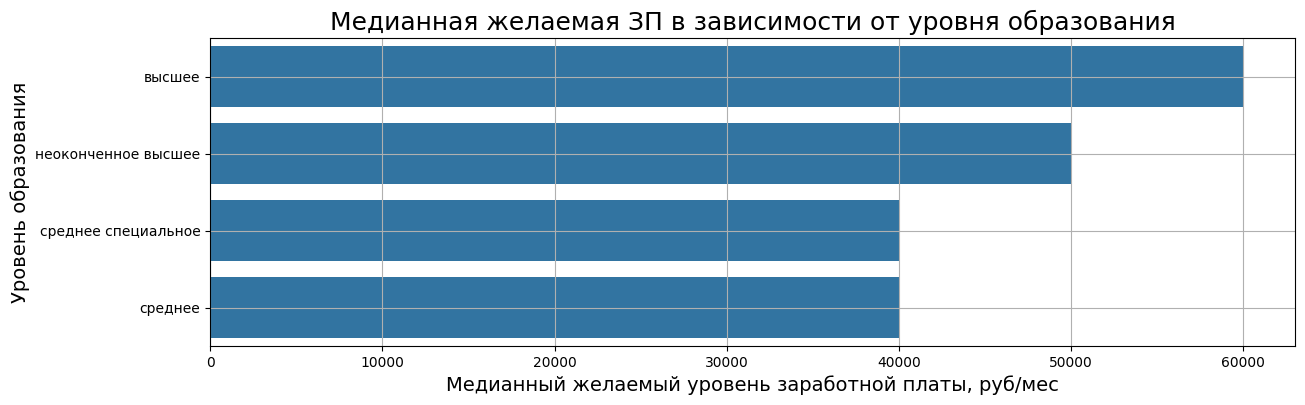

In [16]:
# Изучаем зависимость медианной ЗП от образования соискателей. 
# Для построения используем библиотеку seaborn, 
# Строим стообчатую диаграмму
# Задаем необходимые параметры визуализации
# для упрощения чтения графика /


fig, axes = plt.subplots(figsize=(14, 4))

# Вместо создания нового DF с группировкой по образованию для 
# вычисления медианного значения ЗП, воспользуемся встроенным 
# в seaborn параметром estimator и через него зададим интересующий нас агрегирующий метод

education_sallary = sns.barplot(
    data=hh_cv_final[hh_cv_final['ЗП (руб)'] < 1000000],
    x = 'ЗП (руб)',
    estimator = 'median',
    y='Образование',
    errorbar=None,
    order = ['высшее', 'неоконченное высшее', 'среднее специальное', 'среднее']
    )


education_sallary.set_title(
    'Медианная желаемая ЗП в зависимости от уровня образования', 
    fontsize = 18
    )
education_sallary.set_ylabel(
    'Уровень образования', 
    fontsize = 14
    )
education_sallary.set_xlabel(
    'Медианный желаемый уровень заработной платы, руб/мес', 
    fontsize = 14
    )

education_sallary.grid()


****
**Из полученной столбчатой диаграммы зависимости медианной желаемой ЗП в рубм/мес от уровня образования соискателя, можно сделать следующие выводы и наблюдения:**

1) Наибольшее медианное значение ожидаемой ЗП наблюдается в группе соискателей с высшим образованием

2) Наименьшее медианное значение ожидаемой ЗП наблюдается сразу в двух группах - соискатели со средним и со средним специальным образованием. Причем значения ожидаемой ЗП идентичны. Здесь несколько сложно сделать вывод о природе данной закономерности. Можно лишь сделать предположение, что в обоих случаях речь идет о труде не требующим высокой квалификации с точки зрения уникальных знаний, сколько о труде, требующем навыков, и, возможно, в таком случае наличие либо отсутствие образования в области не дает кандидату большого преимущества. 
Так же, при построении диаграммы в группе лиц со средним образованием наблюдалась стандартная ошибка среднего значения.

3) Промежуточное значение медианной ожидаемой ЗП между указанными выше принадлежит группе с неоконченным высшим образованием.

4) Исходя из проведенного анализа можно сделать вывод, что в общем, такой параметр как образование напрямую влияет на уровень ожидаемой ЗП, причем логичность связи "выше образование - выше ожидаемая ЗП" присутствует. 

****

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

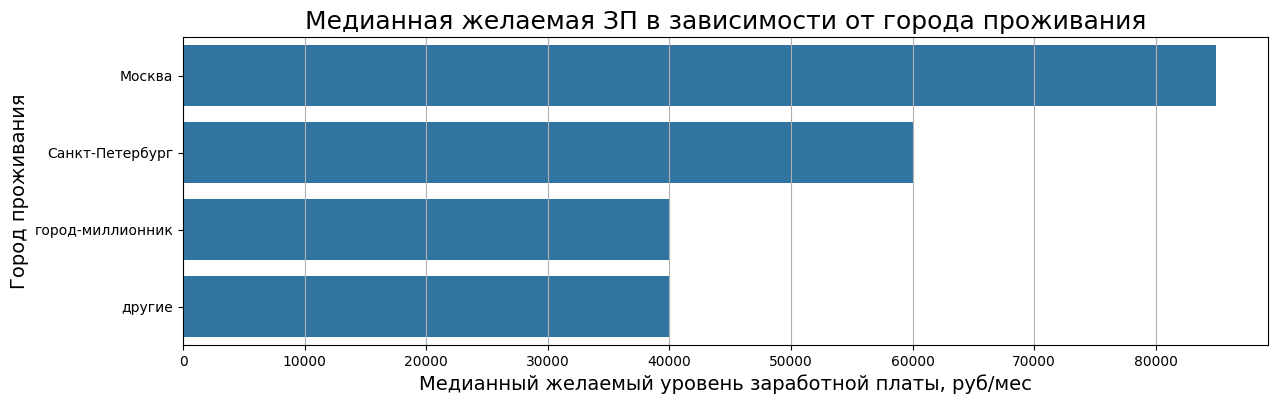

In [17]:

# Изучаем зависимости медианной ЗП от города соискателей. 
# DATA - используем датафрейм с фильттрацией по ЗП (до 1 млн)
# Для построения используем библиотеку seaborn, 
# Строим стообчатую диаграмму. Задаем необходимые параметры 
# визуализации для упрощения чтения графика /


fig, axes = plt.subplots(figsize=(14, 4))


city_sallary = sns.barplot(
    data=hh_cv_final[hh_cv_final['ЗП (руб)'] < 1000000],
    x = 'ЗП (руб)',
    estimator = 'median',
    y='Город',
    errorbar=None,
    order = ['Москва', 'Санкт-Петербург', 'город-миллионник', 'другие']
    )


city_sallary.set_title(
    'Медианная желаемая ЗП в зависимости от города проживания', 
    fontsize = 18
    )
city_sallary.set_ylabel('Город проживания', fontsize = 14)
city_sallary.set_xlabel(
    'Медианный желаемый уровень заработной платы, руб/мес', 
    fontsize = 14
    )

city_sallary.grid(axis='x')



****
**Из полученной столбчатой диаграммы зависимости медианной желаемой ЗП в рубм/мес от города проживания соискателя, можно сделать следующие выводы и наблюдения:**

1) Предсказуемо, наиболее высокие показатели медианной ожидаемой заработной платы в столице, составляют 85.000 руб/мес

2) Так же, что ожидаемо, на втором месте располагаются медианные ожидания по зарплате в Санкт-Петербурге, они равняются 60.000 руб/мес

3) В городах-миллионниках и в прочих городах медианные желаемые заработные платы находятся на одном показателе, в 40.000 руб/мес, что более чем в два раза ниже, чем в столице. 

4) Таким образом, выходит, что ожидания по заработной плате в разрезе города проживания играют роль только, если речь идет о двух крупнейших городах России. Дать анализ почему медианные ожидания в городах-миллионниках и прочих городах совпадают, затруднительно. Можно предположить, что несмотря на более дорогую составляющую по обеспечению жилья (аренда/покупка недвижимости), прочие расходы в городах-миллионниках могут быть ниже за счет развитости малого и среднего бизнеса, присутствия сетевых ритейлеров и поставщиков услуг, что вызывает повышенную конкуренцию и, как следствие для потребителя, более выгодную цену. Что в конечном счете приводит к нивелированию суммарных расходов по сравнению с жителями прочих городов, и, соответственно, требования к желаемой заработной плате находятся на схожем уровне. 


****

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

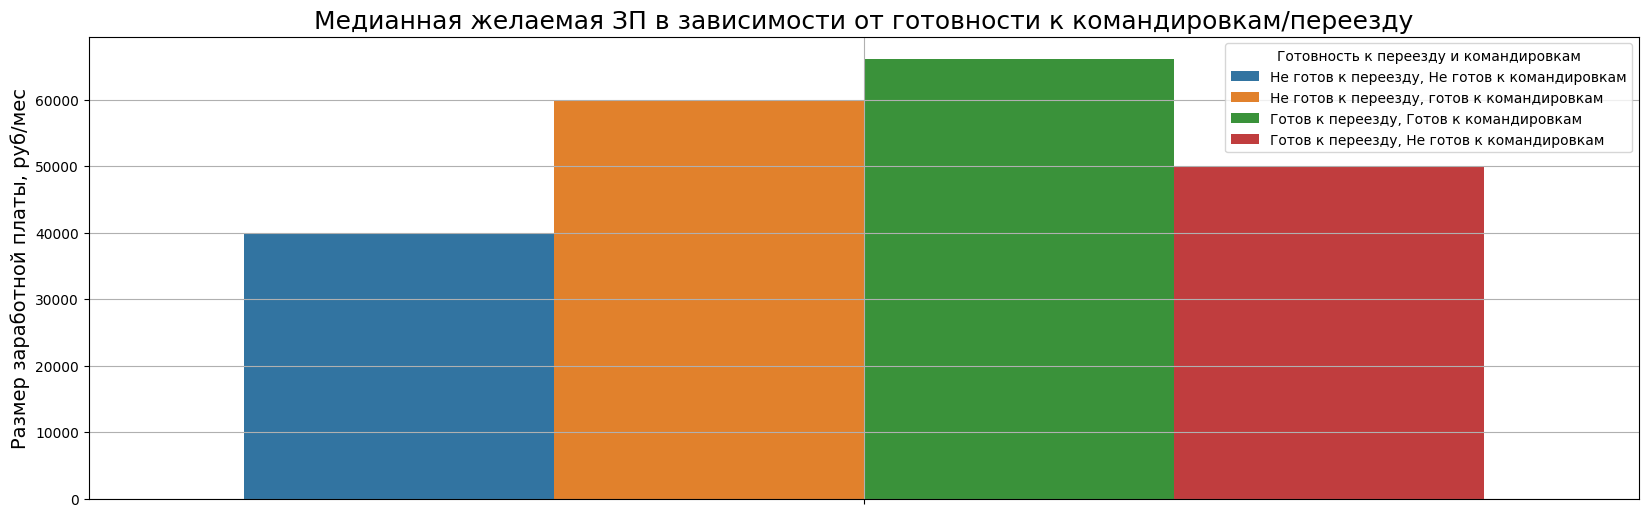

In [18]:
# Изучаем зависимость медианной ЗП от готовности к 
# переезду/командировкам. 
# Создаем новые DF и новые признаки
# Для построения используем библиотеку seaborn, 
# Строим многоуровневую столбчатую диаграмму
# Задаем необходимые параметры визуализации
# для упрощения чтения графика /


fig, axes = plt.subplots(figsize=(20, 6))



# Для построения многоуровневой столбатой диаграммы по нескольким признакам
# нам необходимо осуществить предобработку данных. Создадим новый признак,
# основанный на комбинации существующих двух (готовность к переезду и 
# готовность к командировкам). Значения признака - комбинация 0 и 1 
# в зависимости от статуса готовности к виду мобильности 


bar_data = hh_cv_final.copy()

bar_data['Готовность к переезду'] = \
    bar_data['Готовность к переезду'].apply(
    lambda x: '1' if x is True else '0'
    )
    
bar_data['Готовность к командировкам'] = \
    bar_data['Готовность к командировкам'].apply(
    lambda x: '1' if x is True else '0'
    )
    
bar_data['Готовность к переезду и командировкам'] = \
    bar_data['Готовность к переезду'] + bar_data['Готовность к командировкам']


# Создаем функцию для преобразования значений нового признака в 
# "читаемый" вариант и для использования далее в качестве легенды графика /

def movement_status(elem):
    if elem == '00':
        return 'Не готов к переезду, Не готов к командировкам'
    if elem == '01':
        return 'Не готов к переезду, готов к командировкам'
    if elem == '10':
        return 'Готов к переезду, Не готов к командировкам'
    if elem == '11':
        return 'Готов к переезду, Готов к командировкам'
    
bar_data['Готовность к переезду и командировкам'] = \
    bar_data['Готовность к переезду и командировкам'].apply(movement_status)


# Строим диаграмму

move_sallary = sns.barplot(
    data=bar_data,
    y = 'ЗП (руб)' ,
    estimator = 'median',
    hue = 'Готовность к переезду и командировкам',
    errorbar=None,
    )


move_sallary.set_title(
    'Медианная желаемая ЗП в зависимости от готовности к командировкам/переезду',
    fontsize = 18
    )

move_sallary.set_ylabel('Размер заработной платы, руб/мес', fontsize = 14)
move_sallary.grid()



****
**Из полученной многоуровневой столбчатой диаграммы зависимости медианной желаемой ЗП в руб/мес от готовности к командировкам/переезду, можно сделать следующие выводы и наблюдения:**

1) Что касается ожиданий по заработной плате у кандидатов:  
    * Наибольшее медианное значений ожидаемой ЗП у кандидатов готовых и к переезду, и к командировкам, 66.000 руб., 
    * у кандидатов не готовых к переезду, но готовых к командировкам оно составляет 60.000 руб.,
    * у кандидатов готовых к переезду, но не готовых к командировкам ожидания равны 50.000 руб.,
    * и, наконец, кандидаты не готовые ни к командировкам, ни к переезду, имеют ожидания по заработной плате в 40.000 руб.

2) Полученная зависимость логична и вполне объяснима, за бОльшие неудобства в ходе выполнения своих трудовых обязанностей кандидаты ожидают бОльшую заработную плату. Особенно хорошо и характерно это проявляется в категориях "Не готов к переезду, готов к командировкам" и "готов к переезду, не готов к командировкам": не смотря на присутствующую мобильность в обоих категориях, у кандидатов, готовых к переезду и не готовых к командировкам (т.е. речь идет о разовой мобильности, и дальнейшей оседлости), ожидания по заработной плате ниже. 

3) Исходя из построенных в графике признаков можно сделать вывод, что готовность к командировкам со стороны кандидатов оценивается как фактор, требующий повышенного поощрения. 


****

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

C:\Users\nitys\AppData\Local\Temp\ipykernel_5864\1027706509.py:12: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = hh_cv_final.pivot_table(


Text(0.5, 1.0, 'Распределение медианной ЗП\nв разрезе признаков возраста и уровня образования')

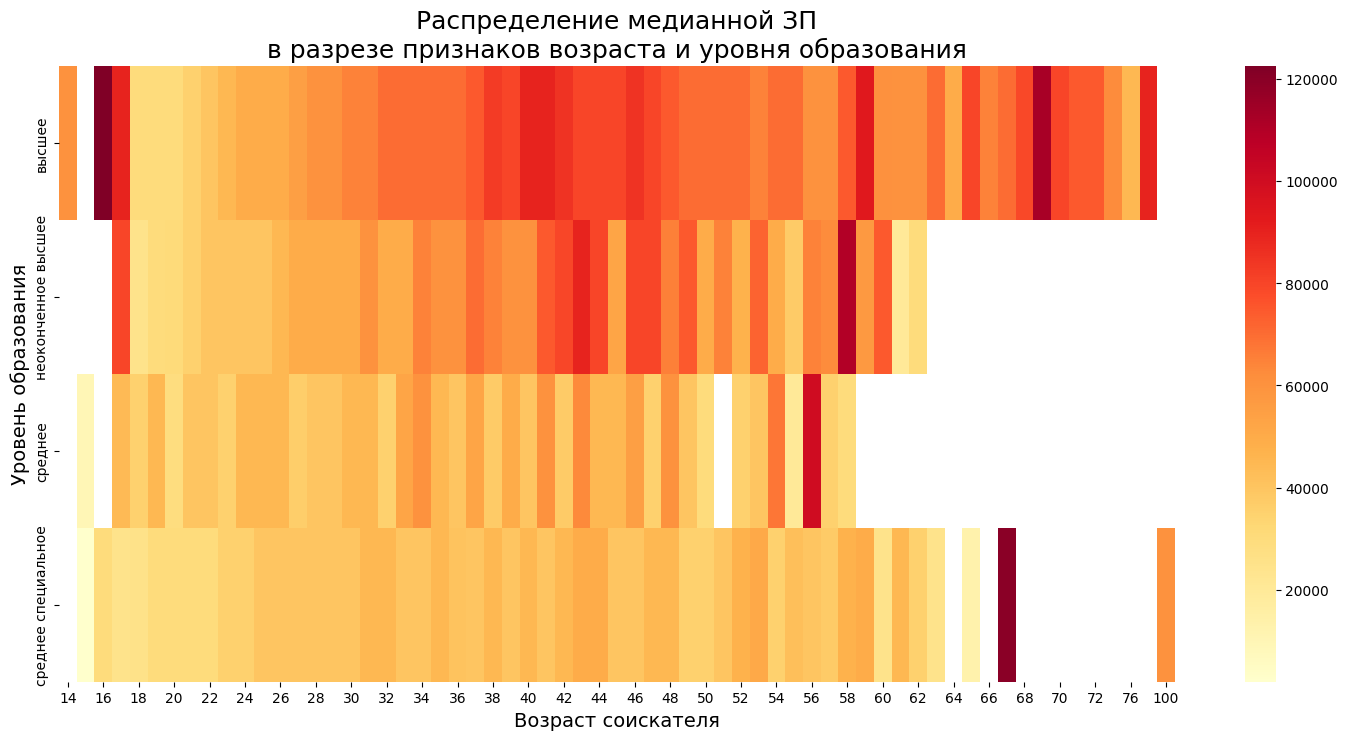

In [19]:
# Изучаем зависимость медианной ЗП от 
# признаков возраста и образования соискателей. 
# Для построения используем библиотеку seaborn, 
# Строим тепловую карту
# Задаем необходимые параметры визуализации
# для упрощения чтения графика /



fig, axes = plt.subplots(figsize=(18, 8))

heatmap_data = hh_cv_final.pivot_table(
    values='ЗП (руб)',
    index='Образование',
    columns='Возраст',
    aggfunc='median'
    )

heatmap = sns.heatmap(
    data=heatmap_data, 
    cmap='YlOrRd',
    xticklabels=2
    )

heatmap.set_ylabel('Уровень образования', fontsize = 14)
heatmap.set_xlabel('Возраст соискателя', fontsize = 14)
heatmap.set_title(('Распределение медианной ЗП' + '\n' +
                   'в разрезе признаков возраста и уровня образования'),
                  fontsize = 18 
                  )


****
**Из полученной тепловой карты распределения признака медианной заработной платы в разрезе уровня образования и возраста соискателей, можно сделать следующие выводы и наблюдения:**

1) Сразу бросается в глаза некорректность определенных данных: 
    * Наличие соискателей с высшим образованием в возрасте от 14 до 20 лет. По стандартной модели обучения, кандидатам с высшим образованием не может быть меньшей 21 года. Данные подлежат проверке, вероятно, соискатели в возрасте 16-20 лет указывали образование как высшее, являясь при этом еще студентами (и тогда они должны попадать в категорию неоконченного высшего). Соискатели в возрасте 14 лет не могут быть в это категории, т.к. на данный момент еще не должны были окончить даже среднее образовательное учреждение. 
    * Так же требуют проверки данные по возрасту 15 лет в разделах среднее образование. Данная категория возможна, но требуется уточнение. 
    * То же касается среднего специального образования, теоретически, это возможно (наличие его в 15 лет), но требует проверки.

2) Наиболее "стабильные" высокие показатели по ожиданию заработной платы с увеличением возраста наблюдаются в группе соискателей с высшим образованием. Так же в этой группе возрастающий тренд ожидания начинается в более раннем возрасте и и выглядит достаточно стабильно с выходом на плато. 

3) Возрастной сегмент с высшим образованием наиболее "долгожителен" с точки зрения активности поиска работы. В отличии от других сегментов, где соискатели перестают искать работу примерно с 60 лет. Но, есть вероятность, конечно, что к этому возрасту люди получают высшее образование и переходят в другое качество, но это лишь вероятность, требующая дополнительных данных для подтверждения. Есть сомнения, что человек в 55 лет решил получить высшее образование. 

4) Если смотреть суммарно, то прослойка высоких ожидаемых зарплат так же принадлежит группе соискателей с высшим образованием. В других группах так же имеются пиковые значения, но они выглядят скорее исключением из правила. К тому же, они наблюдаются, если говорить о среднем и среднем специальном образовании уже после 50ти лет, что говорит нам о том, что скорее речь идет о каких-то прикладных физических навыках, который человек оттачивал всю жизнь и сейчас стал профессионалом своего дела. 


****

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

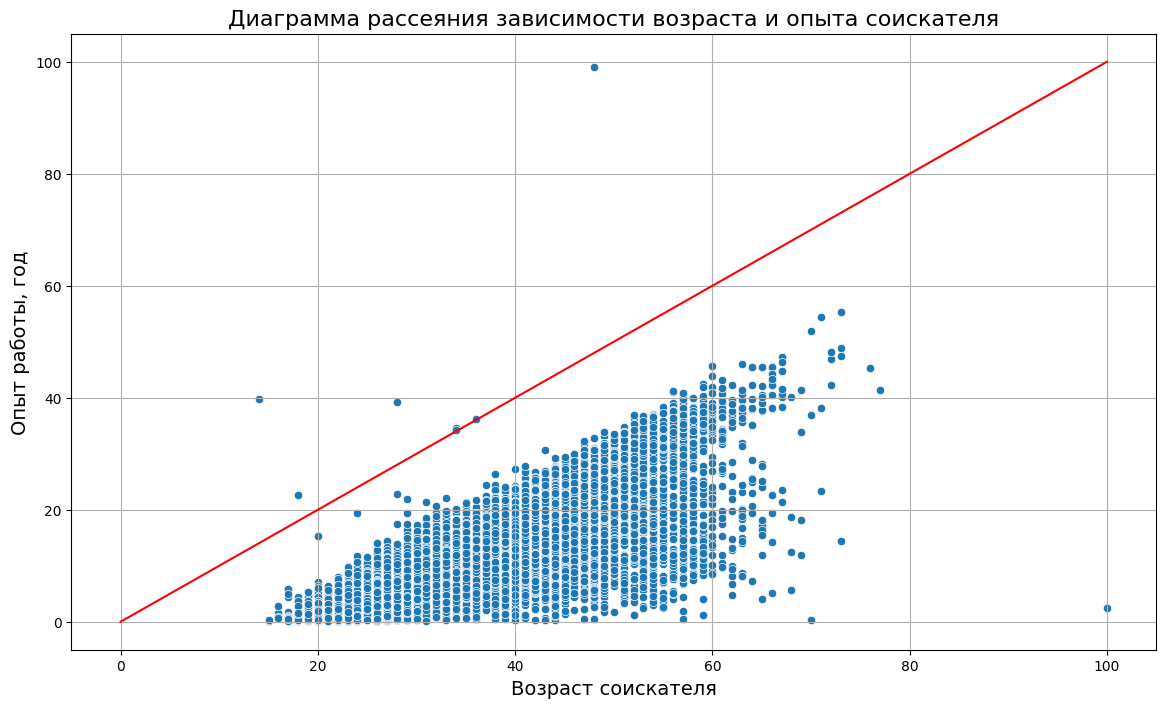

In [20]:
# Изучаем зависимость возраста и опыта работы соискателей. 
# Для построения используем библиотеку seaborn, 
# Строим  диаграмму рассеяния
# Задаем необходимые параметры визуализации
# для упрощения чтения графика 
# Так же, строим линию аномалий. Координатами линии являются
# точки, где возраст = опыт работы /



fig, axes = plt.subplots(figsize=(14, 8))

expr_age_data = hh_cv_final.copy()

expr_age_data['Опыт работы (год)'] = \
    expr_age_data['Опыт работы (месяц)'].apply(lambda x: x/12)
    
expr_age_scatter = sns.scatterplot(
    data = expr_age_data,
    x = 'Возраст',
    y = 'Опыт работы (год)',
    )

expr_age_scatter.set_xlabel('Возраст соискателя', fontsize = 14)
expr_age_scatter.set_ylabel('Опыт работы, год', fontsize = 14)
expr_age_scatter.set_title(
    'Диаграмма рассеяния зависимости возраста и опыта соискателя', 
    fontsize = 16)
expr_age_scatter.grid()


expr_age_scatter.plot([0, 100], [0, 100], color='red')



****
**Из полученной диаграммы рассеяния зависимости возраста и опыта работы соискателей, можно сделать следующие выводы и наблюдения:**

1) Сразу бросается в глаза некорректность определенных данных, имеются аномалии, соискатели, опыт которых превышает их возраст. Так же, вероятно, аномалиями являются данные, лежащие выше прямой (не построена) 14ти лет, ведь это минимальный возраст трудоустройства. Так же наблюдаются аномалии по возрасту - соискатель, которому 100 лет.

2) В общем по всем соискателям наблюдается закономерная картина - распределение зависимостей начинается и идет вдоль линии, характерной возрасту 17 лет, что говорит нам о том, что наиболее ранний возраст трудоустройства (учитывая его частую встречаемость) - лет.  

3) Возвращаясь к ранее выявленным аномалиям, предположение о том, что соискатель возрастом 100 лет и опытом работы 100 лет является одним и тем же лицом, ошибочно.  

4) В данном типе диаграммы сложно произвести оценку количества соискателей по категориям, следует использовать другой тип диаграммы.

****


**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


****
**Изучение зависимости заинтересованности в конкретных режимах работы в разрезе полового признака**

In [ ]:
'''Цель: изучение зависимости заинтересованности в определенных
методах/режимах работы соискателей в зависимости от полового 
признака.

В ходе выполнения кода: копия исходного DF группируется 
по половому признаку и берутся интересующие нас столбцы. 
В новом DF так же создаются признаки относительности от общего 
числа соискателей конкретного пола. Преобразуется порядок столбцов для 
более наглядного (сравнительного) изучение графика.

Визуализация: используется бибиотека plotly express, задействован
subplots. Т.к. признаков большое количество, наполнение 
производим при помощи циклов, "автоматизируя" процесс.
Строятся гистограммы исследуемых признаков
'''

from plotly.subplots import make_subplots
import plotly.graph_objects as go



wregime_sex_df = hh_cv_final.copy()

wregime_sex_df = \
    wregime_sex_df.groupby('Пол')[
        list(hh_cv_final.columns[14:22]) ].sum()


# Считаем кол-во женщин и мужчин соискателей для вычисления 
# относительных значений по группам

womans = hh_cv_final[hh_cv_final['Пол'] == 'Ж'].shape[0]
mans = hh_cv_final[hh_cv_final['Пол'] == 'М'].shape[0]


# Создаем новые признаки, относительные

for elem in list(hh_cv_final.columns[14:22]):
    
    wregime_sex_df[f'{elem}, %'] = wregime_sex_df[elem]
    
    wregime_sex_df[f'{elem}, %']['Ж'] =\
        wregime_sex_df[f'{elem}, %']['Ж'] / womans*100
    
    wregime_sex_df[f'{elem}, %']['М'] =\
        wregime_sex_df[f'{elem}, %']['М'] / mans*100


# Переносим индекс ПОЛ в признак ПОЛ (столбец) 

wregime_sex_df = wregime_sex_df.reset_index()


# Создаем список стобцов, преобразуем его как нам надо 
# для дальнейшей визуализации, чередование абсол и относ,
# Производим перегруппировку признаков в DF\

work_regime_list = list(wregime_sex_df.columns[1:17])

def columns_list_conv(elem):
    list_1 = elem[0:4]
    list_2 = elem[4:8]
    list_3 = elem[8:12]
    list_4 = elem[12:16]
    list_final =  list_1 + list_3 + list_2 + list_4
    return list_final

work_regime_list = columns_list_conv(work_regime_list)

reindex_list = ['Пол'] + work_regime_list

wregime_sex_df = wregime_sex_df.reindex(columns=reindex_list)



# Создаем subplots, в процессе его наполнения графиками 
# задействуем цикл с возвожмностью разбивки по рядам, за это
# отвечают счетчики count_cols, count_rows \

fig_wregime_sex = make_subplots(
    rows=4, cols=4,
    subplot_titles= work_regime_list,
    row_titles = ['Количество', '% заинтересованных', 
                  'Количество', '% заинтересованных' ],
    )

count_cols = 1
count_rows = 1

for elem in range(1,17):

    fig_t = px.histogram(
        wregime_sex_df,
        y = wregime_sex_df.columns[elem],
        x = 'Пол',
        color = wregime_sex_df.columns[elem],
        facet_col_spacing = 0,
        )

    for i in fig_t.data :
        fig_wregime_sex.add_trace(i, row=count_rows, col=count_cols)
    
    if count_cols == 4:
        count_cols = 0
        count_rows += 1  

    count_cols+=1


# Задаем параметры слоя, заголовок, выводим полученный результат

fig_wregime_sex.update_layout(height=1000, width=1200, 
                title_text=\
    ('Распределение абсолютных (количество соискателей) \
и относительных <br> (от общего числа соискателей группы по полу, в %) \
 значений в разрезе признаков типов работ'), 
                title_font_size = 20,
                showlegend=False, 
                )

# fig_wregime_sex.show()
# fig_wregime_sex.write_html('data/work_regime_hist.html')


# [Ссылка на полученный график](https://drive.google.com/file/d/17hbH5gMLBA_By-n8xZRIGELdiulFl32P/view?usp=sharing)

****
**Из столбчатых диаграмм зависимости распределения количества (абсолютного и относительного) соискателей от режима/метода работы, можно сделать следующие выводы и наблюдения:**

1) Исходя из абсолютных показателей (количества соискателей) можно сделать выводы:
    * Меньше всего заинтересованности кандидаты проявляют к волонтерству (486 соискателей) и стажировкам (2804 соискателя), что, вероятно, объяснимо отсутствием оплаты труда в данных категориях.
    Так же, оба этих типа занятости, особенно волонтерство, скорее характерно для студентов и учащихся, чем для тех, кто ищет работу.
    * Наибольшая заинтересованность у соискателей к полному рабочему дню. 41708 соискателей выбрали данный тип занятости при исследуемых 44744. Это логично, является наиболее традиционным типом занятости. 
    * Так же велик спрос у соискателей и на нестандартные режимы работы. В сменном и гибком графике, в удаленной работе, заинтересован, приблизительно, каждый третий соискатель.
    * Гораздо большее количество соискателей - мужчины  

2) Исходя из относительных показателей (процент заинтересованности в конкретном типе/режиме работы внутри группы по полу), можно сделать выводы: 
    * Не смотря на в целом скромные показатели заинтересованности в волонтерстве, показатель заинтересованности женщин (0,6 % от числа соискателей женщин) вдвое меньше аналогичного показателя, чем у мужчин - 1,2 %. Но, как было сказано ранее, заинтересованность в этих видах активности в целом не характерна для людей, ищущих работу. Поэтому вряд ли стоит уделять этому пристальное внимание. Хоть это и занимательный факт, ведь стереотип говорит скорее о том, что большинство волонтеров - девушки. 
    * Второе расхождение мы можем наблюдать в заинтересованности в вахтовом методе работы, 2 % женщин заинтересованы в данном методе, против 8 % среди мужчин. Что опять же, дает нам отсылку к стереотипному "женщина - хранительница домашнего очага". Так же, зачастую, вахтовый метод работы применяется именно в нефтегазовой/металлургической областях, где процент занятых тяжелым физическим трудом выше.
    * В остальном, кардинальных разночтений в заинтересованности среди женщин и среди мужчин в определенном типе занятости, не выявляется. Что говорит нам о том, что, скорее все типа занятости, кроме вахтового метода, являются гендерно-нейтральными. 
      
****


****
**Изучение зависимости готовности к переезду / командировкам в разрезе возрастного признака**

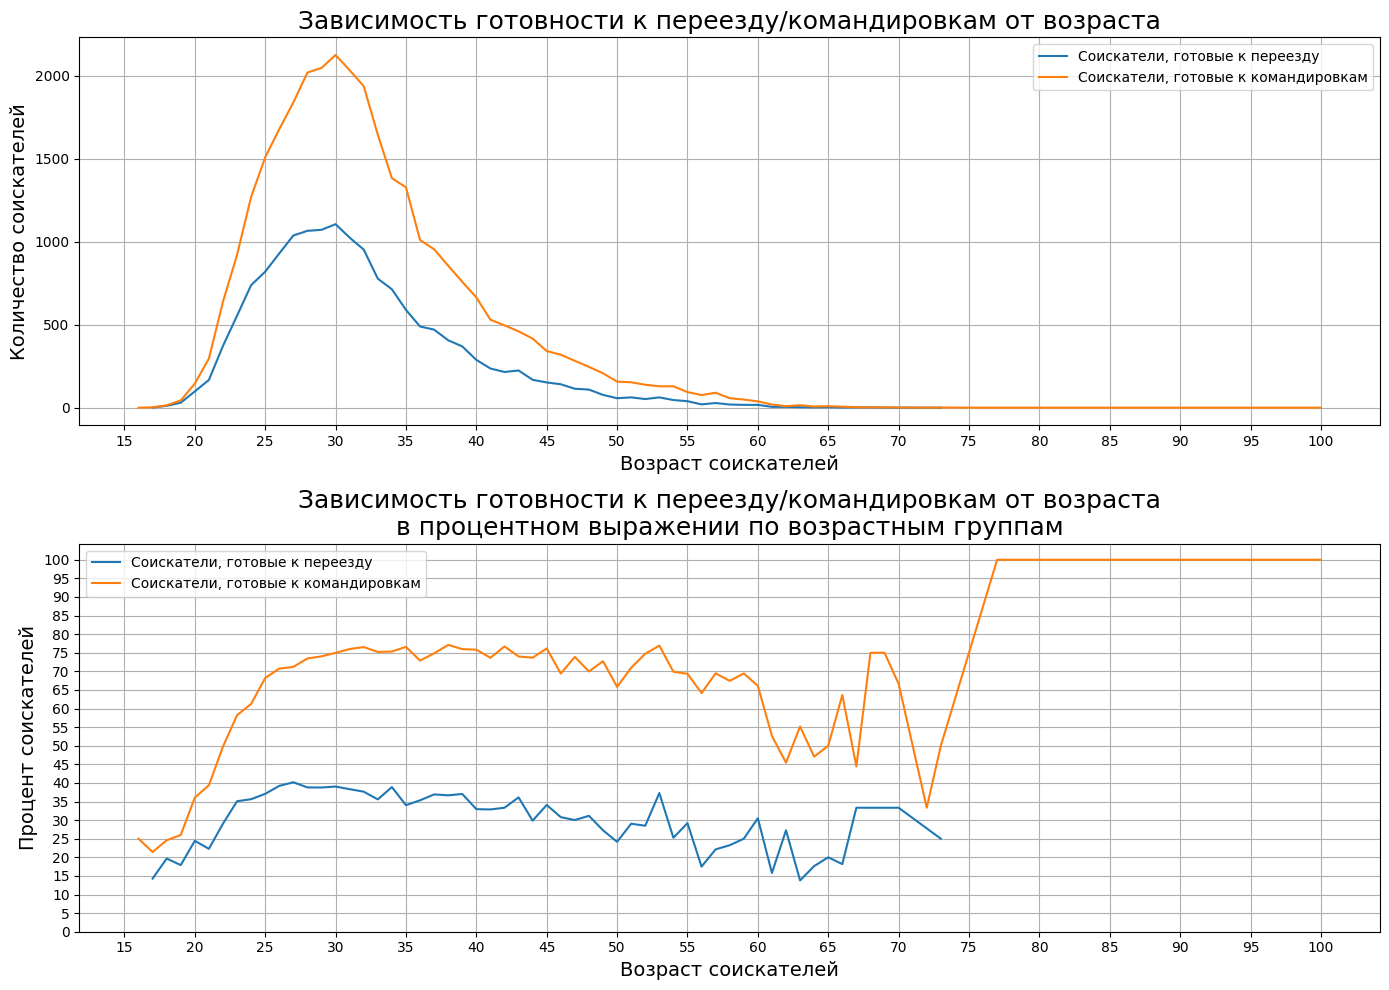

In [22]:
'''Цель: изучение зависимости готовности к переезду/командировкам
в разрезе возрастного признака. Изучаются как абсолютные параметры,
т.е. количество, так и относительные (как процент от "готовых" к 
общему числу представителей группы).

В ходе выполнения кода: создаются копии исходного DF с 
фильтрациями по признакам, создаются сводные таблицы,
которые далее соединияются воедино.

Визуализация: используется библиотека seaborn, задействован
subplots. Строятся линейные зависимости исследуемых признаков
'''


# Подготовим данные и сделаем сводные таблицы, 
# в них будет КОЛИЧЕСТВО соискателей. готовых к переезду 
# и готовых к командировкам, разбито по возрастным группам. 
# Объединим сводные таблицы \

trip_age_data = hh_cv_final[
    hh_cv_final['Готовность к командировкам'] == True
    ]
move_age_data = hh_cv_final[
    hh_cv_final['Готовность к переезду'] == True
    ]

trip_age_data_pivot = pd.pivot_table(
    data=trip_age_data,
    values= 'Готовность к командировкам',
    index= 'Возраст',
    aggfunc= 'count'
    )

move_age_data_pivot = pd.pivot_table(
    data= move_age_data,
    values=  'Готовность к переезду',
    index= 'Возраст',
    aggfunc= 'count'
    )

concated_trip_move = pd.concat(
    [trip_age_data_pivot, move_age_data_pivot], 
    axis=1
    )

concated_trip_move = concated_trip_move.reset_index()


# Для дальнейшей относительной оценки зависимостей сделаем сводную
# таблицу с общим количеством соискателей, группируя по возрасту
# Соединим таблицы concated_trip_move и age_group_total \

age_group_total = pd.pivot_table(
    data=hh_cv_final,
    values= 'Готовность к командировкам',
    index= 'Возраст',
    aggfunc= 'count'
    )

age_group_total = age_group_total.reset_index()

age_group_total = age_group_total.rename(
    columns = {'Готовность к командировкам':'Количество соискателей'}
    )


merged_final = age_group_total.merge(
    concated_trip_move,
    on='Возраст', 
    how='left'
    )


# Введем два новых признака - готовности к переезду и командировкам
# в процентом соотношении от общего числа возрастной группы \

merged_final['Процент готовых к командировкам'] = \
    (merged_final['Готовность к командировкам'] /
     merged_final['Количество соискателей']) * 100

merged_final['Процент готовых к переезду'] = \
    (merged_final['Готовность к переезду'] / 
     merged_final['Количество соискателей']) * 100



# Изобразим зависимости графически в виде линейных графиков 

fig, axes = plt.subplots(ncols=1, nrows=2, figsize=(14, 10))


line_move = sns.lineplot(
            data = merged_final,
            x = 'Возраст',
            y = 'Готовность к переезду',
            label = 'Соискатели, готовые к переезду',
            ax=axes[0],
            )

line_trip = sns.lineplot(
            data = merged_final,
            x = 'Возраст',
            y = 'Готовность к командировкам',
            label = 'Соискатели, готовые к командировкам',
            ax=axes[0],
            )

line_move.legend
line_move.set_title(
    'Зависимость готовности к переезду/командировкам от возраста', 
    fontsize = 18
    )

line_move.set_xlabel('Возраст соискателей', fontsize = 14)
line_move.set_ylabel('Количество соискателей', fontsize = 14)

line_move.set(xticks=list(range(15,105,5)))
line_move.grid()


line_move_percent = sns.lineplot(
            data = merged_final,
            x = 'Возраст',
            y = 'Процент готовых к переезду',
            label = 'Соискатели, готовые к переезду',
            ax=axes[1],
            )

line_trip_percent = sns.lineplot(
            data = merged_final,
            x = 'Возраст',
            y = 'Процент готовых к командировкам',
            label = 'Соискатели, готовые к командировкам',
            ax=axes[1],
            )

line_move_percent.legend
line_move_percent.set_title(
    ('Зависимость готовности к переезду/командировкам от возраста' 
     + '\n' + 'в процентном выражении по возрастным группам'), 
    fontsize = 18
    )

line_move_percent.set_xlabel('Возраст соискателей', fontsize = 14)
line_move_percent.set_ylabel('Процент соискателей', fontsize = 14)

line_move_percent.set(xticks=list(range(15,105,5)))
line_move_percent.set(yticks=list(range(0,105,5)))
line_move_percent.grid()

plt.tight_layout()


****
**Из полученных графиков распределения абсолютного и относительного значений признака готовности к переезду и командировкам, в зависимости от возраста, можно сделать следующие выводы и наблюдения:**

1) Графики готовности к переезду и готовности к командировкам коррелируются между собой, причем количество соискателей, готовых к переезду вдвое меньше, чем готовых к командировкам. 

2) При оценке абсолютных значений показателей готовности к переезду и командировкам, мы наблюдаем пик в возрасте 30 лет, и большое количество соискателей в возрасте 25-35 лет. Можно сделать ложный вывод, который даже кажется логичным, о том, что в молодом возрасте люди более мобильные и готовы к переменам. Для этого построена вторая пара графиков, показывающая относительное выражение распределения признаков. 

3) По графикам относительного выражения готовности к переезду/командировкам (здесь берется отношение "готовых" к общему числу соискателей определенного возраста), мы наблюдаем следующую картину. Рост готовности к мобильности, происходящий до 25ти летнего возраста. А далее, процент готовых соискателей сильно и не меняется. Тренд носит нисходящую природу, но, незначительную. Например, сравнивания группу 30 летних и 45 летних - процент готовых к командировкам одинаков, готовых к переезду - уменьшается всего на 6 %. Какая-то более значительная тенденция к уменьшению мобильности начинается только в 55 лет. 

4) Из этого можно заключить, что готовность к переезду/командировках имеет слабую связь от возраста и на это влияют какие-то иные факторы. Но, конечно, найти мобильного кандидата проще в группе 25-35 лет, но исключительно по причине многочисленности группы. 

5) Странность кривой соискателей, готовых к командировкам, объяснима предполагаемым выбросом (соискатель возраста 100 лет)
****

****
**Построение дополнительного графика - гистограммы к уже построенной диаграмме рассеяния зависимости возраста и опыта работы соискателей**

Text(0.5, 1.0, 'Распределение возраста и опыта работы соискателей\nс учетом "коридора" традиционного возраста первичного трудоустройства')

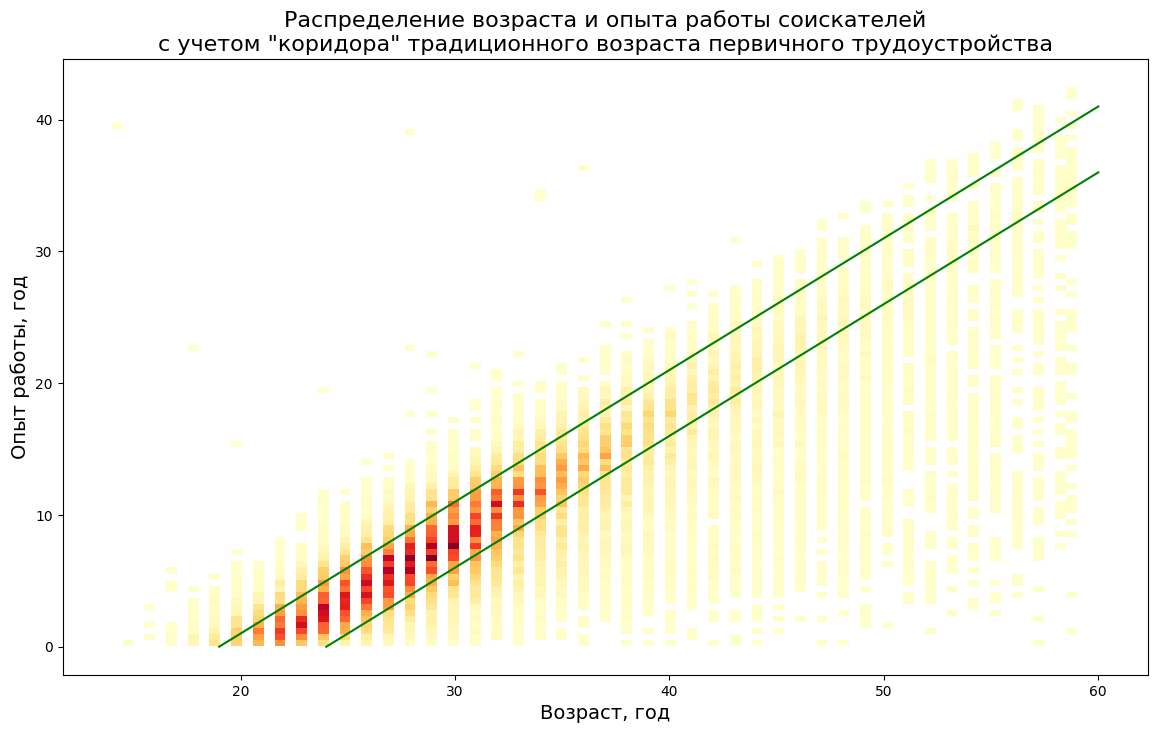

In [23]:
'''
!!! ПРОВЕРЯЮЩЕМУ МЕНТОРУ !!!

Здравствуйте, 

Данная работа не входит для проверки на бонусные баллы. 
Зависимость была построена после выполнения построения диаграммы 
рассеяния аналогичных признаков. Т.к. использование histplot мне 
показалось более информативным и показываещим дополнительно 
одну зависимость. 
'''


'''
Цель: изучение опыта работы соисткателей в заивисимости 
от их возраста. Выявление зависимостей. 
Изучается возврастаная группа до 60 лет.

В ходе выполнения кода: создаем копию DF, задаем маски 
по возрасту и опыту работы (менее 60 лет). Обновляем
DF с учетом масок, используем его для визуализации.

Визуализация: Используется библиотека seaborn. 
Строится гистограмма в осях возраста и опыта работы. 
Используется цветовая гамма для отображения численности.
Так же, строится "коридор" диапазана 17-25 лет как 
традиционного возраста первичного трудоустройства 
'''


expr_age_data_60 = expr_age_data.copy()

mask_age = expr_age_data_60['Возраст'] < 60
mask_expr = expr_age_data_60['Опыт работы (год)'] < 60

expr_age_data_60 = expr_age_data_60[mask_age & mask_expr]


fig, axes = plt.subplots(figsize=(14, 8))
    
expr_age_histplot = sns.histplot(
    data = expr_age_data_60,
    x='Возраст',
    y='Опыт работы (год)',
    cmap='YlOrRd',
    )


expr_age_histplot.plot([19, 60], [0, 41], color='green')
expr_age_histplot.plot([24, 60], [0, 36], color='green')


expr_age_histplot.set_xlabel('Возраст, год', fontsize = 14)
expr_age_histplot.set_ylabel('Опыт работы, год', fontsize = 14)
expr_age_histplot.set_title(
    ('Распределение возраста и опыта работы соискателей' 
     + '\n' + 
    'с учетом "коридора" традиционного возраста первичного трудоустройства'
    ), 
    fontsize=16)



****
**Из гистограммы зависимости возраста и опыта соискателей, построенной в дополнение к диаграмме рассеяния, можно сделать следующие выводы и наблюдения:**

Построив дополнительно на диаграмме "коридор" возвраста 19-24 года, как возраста начала карьеры (на графике изображен в виде двух зеленых линий), мы наблюдаем, что бОльшее количество соискателей попадают в этот коридор. И это говорит нам о том, что перед началом карьеры большинство людей получают какое-то образование, отличное от среднего. 
      
****


# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [24]:
# Создаем копию DF, с которым будем производить очистку данных
# Подсчитаем кол-во строк, создадим DF с дубликатами, 
# подсчитаем их кол-во.
# Произведем очистку от полных дубликатов, сделаем проверку /

 
hh_cv_clr_dupl = hh_cv_final.copy()


mask_hh_cv_dupl = hh_cv_final.duplicated()

hh_duplicates = hh_cv_final[mask_hh_cv_dupl]

rows_orig_quant = hh_cv_final.shape[0]
rows_dupl_quant = hh_duplicates.shape[0]

hh_cv_clr_dupl = hh_cv_clr_dupl.drop_duplicates()

rows_dupl_cleared = hh_cv_clr_dupl.shape[0]


if rows_orig_quant != rows_dupl_quant + rows_dupl_cleared:
    raise ValueError ('Clear unsuccessful, check the data')


# Здесь и далее по коду:
# На этапах очистки данных ведется проверка совпадения
# очищенных данных от количества выбросов /
    
    
# duplicates = hh_cv_final.shape[0] - hh_cv_clr_dupl.shape[0]
# print('Количество дубликатов: ',duplicates)  
# # = 161 
# print(hh_cv_clr_dupl.shape[0])
# # rows = 44583


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [25]:
# Напишем код для выявления признаков, в которых присутствуют
# пропуски, выведем полученные данные на экран /

null_cols_clr = hh_cv_clr_dupl.isnull().sum()
hh_cv_n_cols_clr = null_cols_clr[null_cols_clr>0]

print(hh_cv_n_cols_clr)



Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64


3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [26]:

# Произведем удаление строк в признаках места работы
#  и должности, где данные не заполнены /

hh_cv_clr_job = hh_cv_clr_dupl.copy()

hh_cv_clr_job = hh_cv_clr_job.dropna(
    subset=['Последнее/нынешнее место работы', 
            'Последняя/нынешняя должность']
    )

# Произведем заполнение пропущенных ячеек признака
# опыта работы медианным значение опыта работы 

hh_cv_clr_job = hh_cv_clr_job.fillna(
    {'Опыт работы (месяц)': 
        hh_cv_clr_job['Опыт работы (месяц)'].median()}
    )


# Выведем на экран данные о пропусках, для проверки

print(hh_cv_clr_job.isnull().sum())


# print('Среднее значение опыта работы, мес:', 
#       hh_cv_clr_job['Опыт работы (месяц)'].mean().round()
#       )
# # = 114
# print(hh_cv_clr_job.shape[0])
# # rows = 44581

Ищет работу на должность:          0
Последнее/нынешнее место работы    0
Последняя/нынешняя должность       0
Обновление резюме                  0
Авто                               0
Образование                        0
Пол                                0
Возраст                            0
Опыт работы (месяц)                0
Город                              0
Готовность к переезду              0
Готовность к командировкам         0
полная занятость                   0
частичная занятость                0
проектная работа                   0
волонтерство                       0
стажировка                         0
полный день                        0
сменный график                     0
гибкий график                      0
удаленная работа                   0
вахтовый метод                     0
ЗП (руб)                           0
dtype: int64


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [27]:
# Произведем удаление выбросов по ЗП 
# Критерии - меньше 1к, больше 1кк руб
# Создадим DF с выбросами, с него берем индексы, 
# удаляем из очищаемого DF по индексам /

hh_cv_clr_sallary = hh_cv_clr_job.copy()

mask_low = (hh_cv_clr_sallary['ЗП (руб)'] < 1000)
mask_max = (hh_cv_clr_sallary['ЗП (руб)'] > 1000000)
outliers_sallary = hh_cv_clr_sallary[mask_low | mask_max]

hh_cv_clr_sallary = hh_cv_clr_sallary.drop(outliers_sallary.index)

# print('Количество выбросов по ЗП: ', 
#       outliers_sallary.shape[0]
#       )
# # = 89
# print(hh_cv_clr_sallary.shape[0])
# # rows = 44492

5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [28]:
# Произведем удаление выбросов по опыту работы 
# Критерии - опыт работы больше возраста

hh_cv_clr_expr = hh_cv_clr_sallary.copy()

outliers_expr = hh_cv_clr_expr[
    (hh_cv_clr_expr['Опыт работы (месяц)'] / 12) >
    (hh_cv_clr_expr['Возраст'] )
    ]

hh_cv_clr_expr = hh_cv_clr_expr.drop(outliers_expr.index)


# print('Количество выбросов по опыт > возраст: ', 
#       outliers_expr.shape[0]
#       )
# # = 7
# print(hh_cv_clr_expr.shape[0])
# # rows = 44485


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,Готовность к переезду,Готовность к командировкам,полная занятость,частичная занятость,проектная работа,волонтерство,стажировка,полный день,сменный график,гибкий график,удаленная работа,вахтовый метод,ЗП (руб)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,2019-04-06,Не указано,среднее,М,15,2.0,Санкт-Петербург,False,False,False,True,False,False,False,False,True,True,True,False,10000.0
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,2019-04-09,Не указано,среднее специальное,М,15,3.0,другие,False,False,True,False,False,False,False,True,False,False,False,False,2000.0
33654,Frontend-разработчик,Freelance,Frontend-разработчик,2019-04-19,Не указано,среднее специальное,М,100,30.0,Санкт-Петербург,False,True,True,True,True,False,True,True,False,True,True,False,60000.0


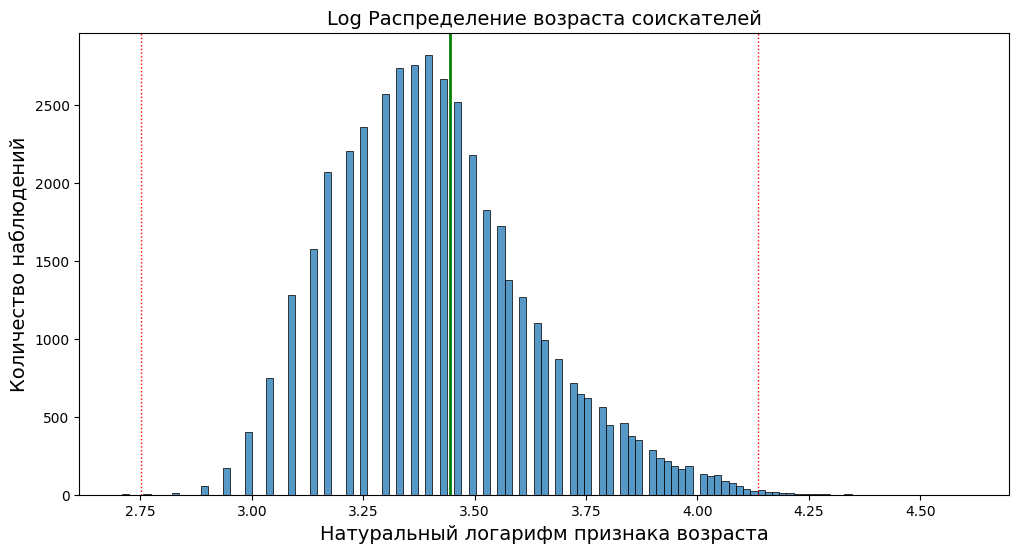

In [29]:
# Произведем очистку данных по возрастному признаку, 
# используем метод z-отклонений 
# Визуализируем данные с линиями выбросов
# используем метод 3-ех сигм /



# Создадим очередную копию DF от копии предыдущих очисток
# Так же, тут ранняя оптимизация по памяти вышла боком, т.к.
# среднее логарифмических значений признаков не "влазит" в INT8, 
# меняем назад тип данных признака возраста на INT64 /

hh_cv_clr_age = hh_cv_clr_expr.copy()

hh_cv_clr_age['Возраст'] = hh_cv_clr_age['Возраст'].astype('int64') 

# Добавим проверку на отсутсвие нулевых значениях, и сразу
# выполним корректирующие мероприятия при их наличии, 
# оповестим об этом пользователя /
 
corrective = 0
if hh_cv_clr_age[hh_cv_clr_age['Возраст'] == 0].shape[0] != 0:
    print('!!! В логарифмируемых значениях есть ноль!!!', '\n', 
          'К значениям прибавлена единица')
    corrective = 1


# Выполним вычисления математического ожидания и стандартного 
# отклонения для построения их на графике в log масштабе 

x = np.log(hh_cv_clr_age['Возраст'])

mu = x.mean()
sigma = x.std()


# Приступим к визуализации, строим график в log масштабе
 
fig, axes = plt.subplots(figsize = (12,6))


# Чтобы каждый раз не происходила операция прибавления нуля 
# (в случае отсутствия нулевых значений в данных), сделаем
# изначальную проверку и пойдем по одному из двух алгоритмов /

if corrective == 0:
    histplot_age_log = sns.histplot(
        data=x,
        )
else:
    histplot_age_log = sns.histplot(
        data=x,
        ) 

histplot_age_log.set_title(
    'Log Распределение возраста соискателей',
    fontsize = 14
    )

histplot_age_log.set_xlabel(
    'Натуральный логарифм признака возраста', fontsize = 14
    )
histplot_age_log.set_ylabel(
    'Количество наблюдений', fontsize = 14
    )


# Добавим вспомогательные линии, характерные для мат ожадания
# и границ выбросов по методу трех сигм /

histplot_age_log.axvline(mu, color = 'green', lw = 2)

histplot_age_log.axvline(
    (mu - 3*sigma), 
    color = 'red', 
    lw = 1, ls = ':'
    )
histplot_age_log.axvline(
    (mu + 3*sigma), 
    color = 'red', 
    lw = 1, ls = ':'
    )


# Присутум к поиску выбросов методом Z - отклонений
# Вычислим правые, левые границы выбросов /

# Комментарий по правой границе - 4 сигмы ниже
lower_band = mu-3*sigma
upper_bound = mu+4*sigma

min_age = np.e**lower_band
max_age = np.e**upper_bound

# print('min age =', min_age, '   max age =', max_age)
# # Полученные значения по границам выбросов при 3-х сигм: 
# # левая граница = 15,6 лет - это ок, 
# # правая граница = 62,6 лет - это не ок, т.к.
# # это даже не пенсионный возраст, а многие работают и после
# # Принимаем решение в послаблении правой границы = 4 сигмы /


# Произведем формирование DF с выбросами, работаем в log масштабе

mask_age_min = np.log(hh_cv_clr_age['Возраст']) <= lower_band
mask_age_max = np.log(hh_cv_clr_age['Возраст']) >= upper_bound


outliers_age = hh_cv_clr_age[mask_age_min | mask_age_max]


# Выведем DF с выбросами на экран

pd.set_option('display.max_columns', None)
display(outliers_age)



# Произведем очистку данных от выбросов по возрасту,
# сформировав итоговый DF /

hh_cv_clr_final = hh_cv_clr_age.drop(outliers_age.index)


# hh_cv_clr_final.shape[0]
# # rows = 44482



****
**По результатам проверки выбросов по признаку возраста и построения диаграммы в log масштабе, можно сказать следующее:**

1) Построенная гистограмма распределения признака возраста в логарифмическом масштабе имеет правостороннюю ассиметрию.

2) При выборе послабления для правой границы так же проверялся поправочный коэффициент равный 3.5, что соответствует 70.3 годам. В результате мы получили 13 выбросов ("справа"), которые уже не затруднительно проверить "вручную". Проверив данные по соискателям в возрасте 71-77 лет, можно сказать, что эти данные не являются выбросами. Представлены специалисты умственного труда, с высшим образованием, преимущественно из Москвы и С.-Петербурга, где продолжительность жизни и возможности карьерной реализации выше. Поэтому, можно сказать, что послабление коэффициента до 4 является корректным, здесь попадает конкретная аномалия - соискатель с возрастом 100 лет, опытом работы 24 месяца. 

3) Что касается выбросов по левой границе - имеется 2 соискателя возраста 15 лет. Проверяя "вручную", можно сказать, что есть вероятность, что часть из этих данных может и являться действительными. У одного соискателя указано среднее специальное образование. В теории такое возможно, если человек, закончив 9 классов, пошел в средне-специальное учебное заведение. И поступил в школу ранее, чем 7 лет, "перескакивал" классы. Но, количество этих данных незначительно, поэтому рисковать их и оставлять, в случае если они действительно являются аномалиями, не стоит.  

**** 


In [30]:
!pip freeze > requirements.txt